In [29]:
""""
Enam Langkah Testing:
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ^2,p, atau data lain berdistribusi 
tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang
digunakan.
6. Ambil keputusan dengan TOLAK H0
jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0
jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import normaltest
from scipy.stats import ttest_1samp
from scipy import stats
from scipy.stats import norm
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest
#read file
path=r"D:\Semester 4\Probstat\Tubes-Probstat\water_potability.csv"
df = pd.read_csv(path,names=["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"])
#print(df)


In [38]:
def nomor1(nama):
    df1 = df[nama]
    count = {'mean':df1.mean(),'median':df1.median(),'modus':df1.mode().values,
          'standar deviasi':df1.std(), 'variansi':df1.var(),
           'range':df1.max()-df1.min(), 'minimum':df1.min(), 
           'maksimum':df1.max(),'kuartil 1':df1.quantile(0.25),
           'kuartil 2':df1.quantile(0.5),'kuartil 3':df1.quantile(0.75), 
           'IQR':df1.quantile(0.75) - df1.quantile(0.25), 'skewness':df1.skew(),
           'kurtosis':df1.kurtosis()
          }
    count_list = list(count.items())

    new_df = pd.DataFrame.from_dict(count_list)
    return new_df.style.set_table_attributes("style='display:inline'").set_caption('Deskripsi Statistik '+nama)

In [39]:
nomor1('id')
#harus coba semua

,0,1
0,mean,1005.500000
1,median,1005.500000
2,modus,[ 1 2 3 ... 2008 2009 2010]
3,standar deviasi,580.381340
4,variansi,336842.500000
5,range,2009
6,minimum,1
7,maksimum,2010
8,kuartil 1,503.250000
9,kuartil 2,1005.500000


In [40]:
def nomor2(nama):
    df1=df[nama]
    print("Histogram :")
    df1.plot(kind='hist',edgecolor='black', color='skyblue', title="Histogram "+nama, grid=True)
    plt.show()
    print("Boxplot :")
    df.boxplot(column=nama)
    plt.show()

Histogram :


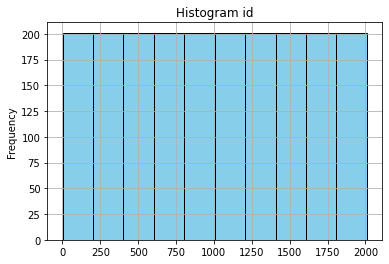

Boxplot :


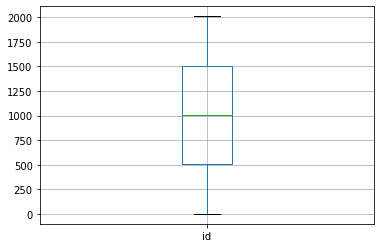

In [41]:
nomor2('id')
#harus coba semua

In [42]:
def normality_test(nama):
    statistic, p_val = stats.normaltest(df[nama])
    print("Nilai P : "+str(p_val))
    alpha = 0.05
    # jika p-value > alpha, maka distribusi normal
    print("Kolom "+nama,end=' ')
    if p_val > alpha:
        print("berdistribusi normal.")
    else:
        print("tidak berdistribusi normal.")

In [43]:
normality_test('pH')
#harus coba semua

Nilai P : 2.6514813346797777e-05
Kolom pH tidak berdistribusi normal.


Nilai uji statistik : 2.485445147379887
Nilai P : 0.006509872359240925
Berdasarkan uji hipotesis menggunakan P-value,
maka hipotesis nol H0 DITOLAK


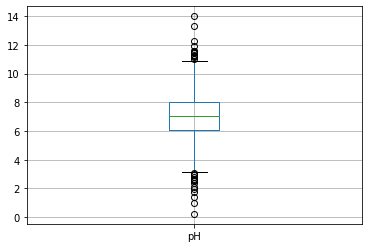

In [44]:
# nomor 4a
#b. Nilai Rata-rata Hardness tidak sama dengan 205?
#c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?
#d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?
#e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?
# Sampel yang diambil adalah seluruh populasinya.
# a. Nilai Rata-Rata pH di atas 7?
df1 = df["pH"]
# 1. Tentukan Hipotesis Nol, H0 : mean = 7
# 2. Tentukan Hipotesis Alternatif, H1 : mean > 7
# 3. Tentukan tingkat signifikansi alfa
alfa = 0.05
# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Daerah kritis hipotesis alternatif ada di sebelah kanan nilai kritis
# uji T test dan mencari p_value
# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
stat, p_value = stats.ttest_1samp(df1, 7)
# Karena ttest_1samp secara default merupakan two-sided, maka p_value dibagi 2
p_value /= 2
print("Nilai uji statistik :",stat)
print("Nilai P :",p_value)
# 6. Ambil keputusan tolak atau terima, berdasarkan p-value
print("Berdasarkan uji hipotesis menggunakan P-value,\nmaka hipotesis nol H0",end=' ')
if (p_value < alfa):
  print("DITOLAK")
else:
  print("TIDAK DITOLAK")

df.boxplot(column="pH")
plt.show()

   α =  0.05
   Didapatkan daerah kritis z > 1.959963984540054 atau z < -1.959963984540054
   Digunakan uji statistik z
   p value =  2.5128904895144654e-35
   z value =  -12.403137170010732
6. Ambil keputusan apakah H0 ditolak atau tidak
   H0 ditolak karena nilai ztest berada pada daerah kritis
   H0 ditolak karena p value lebih kecil dari nilai signifikan
Boxplot:


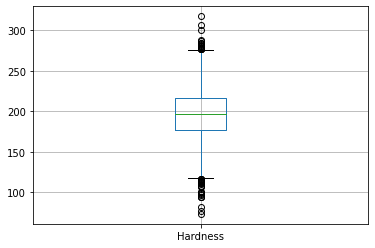

In [45]:
# nomor 4b
# Sampel yang diambil adalah seluruh populasinya.
#b. Nilai Rata-rata Hardness tidak sama dengan 205?
#("Enam langkah testing:")
#("1. Tentukan hipotesis nol atau H0")
#("   H0: μ = 116")
#("2. Tentukan hipotesis alternatif atau H1")
#("   H1: μ != 116")
#("3. Tentukan tingkat signifikan α")
alfa = 0.05
print("   α = ", alfa)
#4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis")
daerahKritis = stats.norm.ppf(1-(alfa/2))
print("   Didapatkan daerah kritis z > "+str(daerahKritis)+" atau z < -"+str(daerahKritis))
print("   Digunakan uji statistik z")
#print("5. Hitung uji nilai statistik dari data sample")
ztest ,pval = stests.ztest(df["Hardness"], x2=None, value=205)
print("   p value = ", float(pval))
print("   z value = ", ztest)
print("6. Ambil keputusan apakah H0 ditolak atau tidak")
if (ztest > daerahKritis or ztest < -daerahKritis):
    print("   H0 ditolak karena nilai ztest berada pada daerah kritis")
else:
    print("   H0 diterima karena nilai ztest tidak berada pada daerah kritis")
if (pval < 0.05):
    print("   H0 ditolak karena p value lebih kecil dari nilai signifikan")
else:
    print("   H0 diterima karena p value lebih besar dari nilai signifikan")
print("Boxplot:")
%matplotlib inline
boxplot = df.boxplot(column=["Hardness"])

In [46]:
#c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?
#langkah sama kaya no 4a

In [47]:
#d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?
#langkah sama kaya no 4a

In [48]:
#e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?
#langkah sama kaya no 4a

Plot data awal Sulfate:


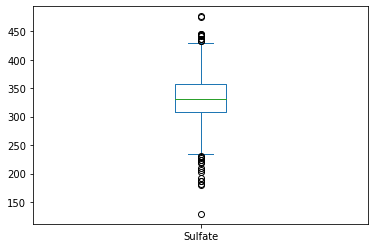

Plot data akhir Sulfate:


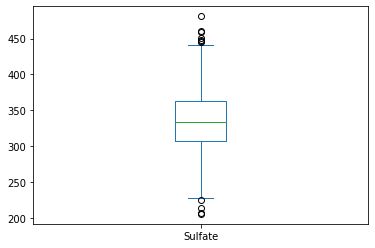

Nilai uji statistik:  -2.1177172044750745
P value:  0.034444306652381386
Daerah kritis diantara  -1.646372735186523  dan  1.6463727351865223

Kesimpulan:
H0 ditolak


In [51]:
#nomor 5
"""
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.
a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata kedua bagian tersebut sama?
"""
alpha = 0.05

# data bagian awal
df1 = df['Sulfate'][:1005]
# data bagian akhir
df2 = df['Sulfate'][1005:]

# plot data
print('Plot data awal Sulfate:')
df1.plot.box()
plt.show()
print('Plot data akhir Sulfate:')
df2.plot.box()
plt.show()

# uji statistik (t test)
tstat, pval = stats.ttest_rel(df1, df2)
print('Nilai uji statistik: ', tstat)

# P value
print('P value: ', pval)

# Daerah kritis
x = stats.t.ppf(alpha, len(df1)-1)
y = stats.t.ppf(1-alpha, len(df2)-1)
print('Daerah kritis diantara ', x, ' dan ', y)

# Kesimpulan
print('\nKesimpulan:')
if (alpha > pval):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')





Plot data awal OrganicCarbon:


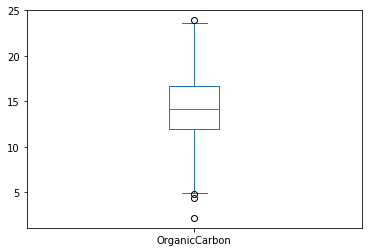

Plot data akhir OrganicCarbon:


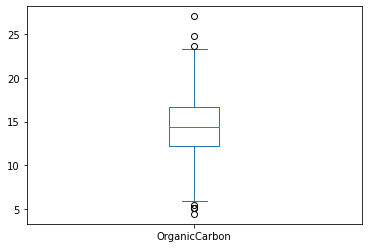

Nilai uji statistik:  -2.413145517798807
P value:  0.01581550381760006
Daerah kritis pada z > z(0.05) atau z < -z(0.05)

Kesimpulan:
H0 tidak ditolak


In [52]:
"""
b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?
"""
alpha = 0.05

# data bagian awal
df1 = df['OrganicCarbon'][:1005]
# data bagian akhir
df2 = df['OrganicCarbon'][1005:]

# plot data
print('Plot data awal OrganicCarbon:')
df1.plot.box()
plt.show()
print('Plot data akhir OrganicCarbon:')
df2.plot.box()
plt.show()

# uji statistik (test z)
ztest, pval = stests.ztest(df1, x2=df2, value=0.15, alternative='two-sided')
print('Nilai uji statistik: ', ztest)

# P value
print('P value: ', pval)

# Daerah kritis
print('Daerah kritis pada z > z(0.05) atau z < -z(0.05)')

# Kesimpulan
print('\nKesimpulan:')
if (pval < alpha):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')



Plot data awal Chloramines:


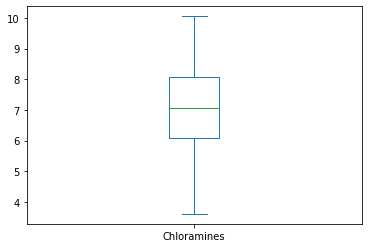

Plot data akhir Chloramines:


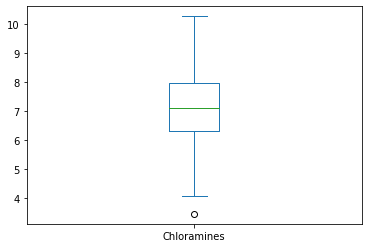

Nilai uji statistik:  -0.6683369073842939
P value:  0.5054738364553271
Daerah kritis diantara  -1.6603911559963902  dan  1.6603911559963895

Kesimpulan:
H0 tidak ditolak


In [3]:
"""
c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
"""
alpha = 0.05

# data bagian awal
df1 = df['Chloramines'][:100]
# data bagian akhir
df2 = df['Chloramines'][1910:2010]

# plot data
print('Plot data awal Chloramines:')
df1.plot.box()
plt.show()
print('Plot data akhir Chloramines:')
df2.plot.box()
plt.show()

# uji statistik (t test)
tstat, pval = stats.ttest_rel(df1, df2)
print('Nilai uji statistik: ', tstat)

# P value
print('P value: ', pval)

# Daerah kritis
x = stats.t.ppf(alpha, len(df1)-1)
y = stats.t.ppf(1-alpha, len(df2)-1)
print('Daerah kritis diantara ', x, ' dan ', y)

# Kesimpulan
print('\nKesimpulan:')
if (alpha > pval):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')

Plot data awal Turbidity:


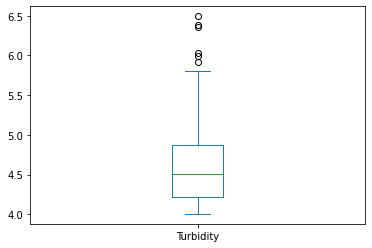

Plot data akhir Turbidity:


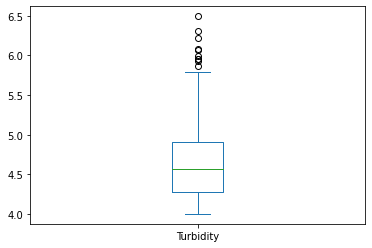

Nilai uji statistik:  -0.13388958661778735
Daerah kritis terletak pada z >  1.6448536269514722

Kesimpulan:
H0 tidak ditolak


In [33]:
"""
d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada,
proporsi nilai yang sama di bagian akhir Turbidity ?
"""


# nilai tingkat signifikan
alpha = 0.05

# data bagian awal
bagatas = df['Turbidity'][:1005][df['Turbidity'] > 4]
# data bagian akhir
bagbawah = df['Turbidity'][1005:][df['Turbidity'] > 4]

# plot data
print('Plot data awal Turbidity:')
bagatas.plot.box()
plt.show()
print('Plot data akhir Turbidity:')
bagbawah.plot.box()
plt.show()

# jumlah data awal dan akhir Turbidity
nr1 = 1005
nr2 = 1005

# uji statistik (test z)
p1 = len(bagatas)/nr1
p2 = len(bagbawah)/nr2
p = (len(bagatas) + len(bagbawah))/(nr1+nr2)
q = 1-p

z = (p1-p2)/math.sqrt(p*q*(1/nr1 + 1/nr2))

print('Nilai uji statistik: ', z)

# Daerah kritis
zkritis = stats.norm.ppf(1-alpha)
print('Daerah kritis terletak pada z > ', zkritis)

# Kesimpulan
print('\nKesimpulan:')
if (z > zkritis):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')


Plot data awal Sulfate:


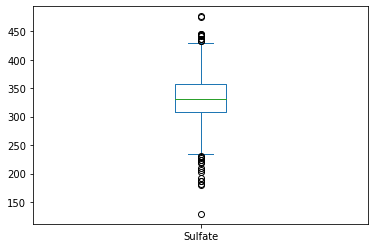

Plot data akhir Sulfate:


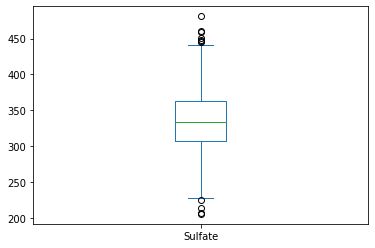

Variance data awal Sulfate:  1708.3966020772502
Variance data akhir Sulfate:  1682.7330644425087
Nilai uji statistik:  1.0152511043950063
P value:  0.40526664801745826
f memiliki daerah kritis pada f >  1.1317692392568777  dan f <  0.883572344355818

Kesimpulan:
H0 tidak ditolak


In [37]:
"""
e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?
"""

# H0 = var1 = var2
# H1 = var1 != var2

# nilai tingkat signifikan
alpha = 0.05

# Data bagian awal
df1 = df['Sulfate'][:1005]
# Data bagian akhir
df2 = df['Sulfate'][1005:]

# Plot data
print('Plot data awal Sulfate:')
df1.plot.box()
plt.show()
print('Plot data akhir Sulfate:')
df2.plot.box()
plt.show()

# degrees of freedom
dfn = len(df1)-1
dfd = len(df2)-1

# Variance dari data awal dan akhir
var1 = df1.var(ddof=1)
var2 = df2.var(ddof=1)
print('Variance data awal Sulfate: ', var1)
print('Variance data akhir Sulfate: ', var2)

# Uji statistik (test f)
f = var1/var2
print('Nilai uji statistik: ', f)

# P Value
f_pval = 1-stats.f.cdf(f, dfn, dfd)
print('P value: ', f_pval)

# Daerah kritis
fkritis1 = stats.f(dfn, dfd).ppf(1-alpha/2)
fkritis2 = stats.f(dfn, dfd).ppf(alpha/2)
print('f memiliki daerah kritis pada f > ', fkritis1, ' dan f < ', fkritis2)

# Kesimpulan
print('\nKesimpulan:')
if (f > fkritis1 or f < fkritis2):
    print('H0 ditolak')
else:
    print('H0 tidak ditolak')

In [58]:
#nomor 6
#Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
#dengan menggambarkan juga scatter plot nya. Gunakan correlation test
def nomor6(nama):
    df.plot(kind='scatter', x=nama, y="Potability", color="blue")
    plt.show()
    df1 = df[nama]
    cor = df1.corr(method='pearson', other=df["Potability"])
    print("Koefisien Korelasi Pearson dari "+nama+" : "+str(cor))
    print("Korelasi antara kolom "+nama+" dan kolom Potability adalah",end=' ')
    if 0 < cor < 1:
        print("positive correlation.")
    elif -1 < cor < 0:
        print("negative correlation.")
    elif cor == 1:
        print("perfect positive correlation.")
    elif cor == -1:
        print("perfect negative correlation.")
    elif cor == 0:
        print("tidak memiliki correlation.")
    else: # cor diluar -1 <= cor <= 1
        print("error.")


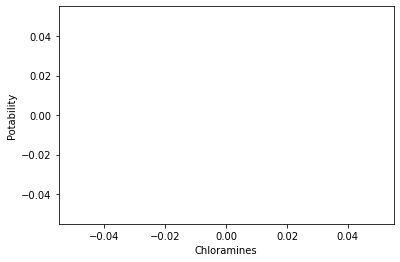

Koefisien Korelasi Pearson dari Chloramines : nan
Korelasi antara kolom Chloramines dan kolom Potability adalah error.


In [59]:
nomor6('Chloramines')